# Models

In [153]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle

In [152]:
data

,Name1,Name2,Name1_res,Draw,Name2_res,Names_x,Intelligence_x,Strength_x,Speed_x,Durability_x,Power_x,Combat_x,Names_y,Intelligence_y,Strength_y,Speed_y,Durability_y,Power_y,Combat_y
0,Batman,Superman,30.4,1.5,68.2,Batman,82.33,17.62,21.84,18.40,24.60,92.56,Superman,80.13,93.59,88.62,77.69,83.72,70.90
1,Hulk,Superman,28.5,0.8,70.8,Hulk,65.83,91.39,62.83,78.89,85.56,68.06,Superman,80.13,93.59,88.62,77.69,83.72,70.90
2,Hulk,Iron Man,80.2,1.5,18.3,Hulk,65.83,91.39,62.83,78.89,85.56,68.06,Iron Man,88.08,78.85,65.58,71.27,80.58,71.54
3,Iceman,Human Torch,80.9,0.6,18.5,Iceman,58.33,24.33,31.33,50.00,71.67,56.67,Human Torch,65.00,8.00,35.00,36.67,56.67,48.33
4,Wolverine,Catwoman,94.1,0.0,5.9,Wolverine,65.00,17.33,18.83,56.67,52.50,82.50,Catwoman,58.75,4.12,10.62,9.56,14.19,59.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28042,Cosmic Armor Superman,Captain Marvel,100.0,0.0,0.0,Cosmic Armor Superman,100.00,100.00,100.00,100.00,100.00,95.00,Captain Marvel,61.88,70.00,70.00,59.38,84.38,80.00
28043,Swarm,Gambit,25.0,0.0,75.0,Swarm,80.00,8.00,25.00,15.00,30.00,40.00,Gambit,65.00,5.00,25.00,15.00,60.00,75.00
28044,Doctor Doom,Zom,0.0,0.0,100.0,Doctor Doom,92.50,85.71,79.79,76.43,83.57,83.93,Zom,90.00,100.00,100.00,100.00,100.00,80.00
28045,Lex Luthor,Mastermind,80.0,0.0,20.0,Lex Luthor,90.00,51.64,53.45,45.27,42.36,43.73,Mastermind,67.50,3.00,6.50,6.50,40.00,45.00


In [142]:
def reset_model():
    #To read the data
    data = pd.read_csv('battles_data.csv')

    #To split the data into 80% training and 20% testing
    _80 = len(data)
    80/100*_80

    #Assigning and spliting the data 80/20
    #For the y data, the first name has been selected randomly
    trainx = data[:22438]
    trainy = data['Name1_res'][:22438]

    testx = data[22438:]
    testy = data['Name1_res'][22438:]

    train_draw = trainx['Draw']
    test_draw  = testx['Draw']

    #To prepare the data to be modelled, the irrelevent columns are dropped
    trainx = trainx.drop(['Name1', 'Name2', 'Name1_res', 'Draw', 'Name2_res', 'Names_x', 'Names_y'], axis = 1)
    testx = testx.drop(['Name1', 'Name2', 'Name1_res', 'Draw', 'Name2_res', 'Names_x', 'Names_y'], axis = 1)

    return(trainx, trainy, testx, testy, train_draw, test_draw)


In [144]:
#Regression Model: Attempt 1

trainx, trainy, testx, testy, train_draw, test_draw = reset_model()

#To model the data
model = sm.OLS(trainy, trainx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Name1_res   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              4680.
Date:                Sat, 21 May 2022   Prob (F-statistic):                        0.00
Time:                        23:12:44   Log-Likelihood:                     -1.1191e+05
No. Observations:               22438   AIC:                                  2.238e+05
Df Residuals:                   22426   BIC:                                  2.239e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intelligence_x     0.4176      0.018     22.834      0.000       0.382       0.453
Strength_x         0.1288      0.018      7.013      0.000       0.093       0.165
Speed_x           -0.0256      0.018     -1.407      0.159      -0.061       0.010
Durability_x      -0.0816      0.026     -3.176      0.001      -0.132      -0.031
Power_x            0.6222      0.020     30.472      0.000       0.582       0.662
Combat_x           0.2329      0.013     17.985      0.000       0.207       0.258
Intelligence_y     0.1079      0.018      6.059      0.000       0.073       0.143
Strength_y        -0.0642      0.018     -3.613      0.000      -0.099      -0.029
Speed_y           -0.1663      0.018     -9.304      0.000      -0.201      -0.131
Durability_y      -0.1066      0.025     -4.331      0.000      -0.155      -0.058
Power_y           -0.3946      0.019    -20.253      0.000      -0.433      -0.356
Combat_y          -0.0430      0.013     -3.383      0.001      -0.068      -0.018
==============================================================================
Omnibus:                      418.966   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.651
Skew:                           0.004   Prob(JB):                     1.36e-50
Kurtosis:                       2.504   Cond. No.                         27.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this summary, the R-squared value is pretty close to 1, it is however uncentered
As we can see, the p-values are looking as well with the exception of "Speed_x"
In the next attempt to optimize this model, I add a constant and remove the features with a p-value above the standard 0.05

In [145]:
#Regression Model: Attempt 2

trainx, trainy, testx, testy, train_draw, test_draw = reset_model()

#To add a constant
trainx = sm.add_constant(trainx)
testx = sm.add_constant(testx)

#To model the data
model = sm.OLS(trainy, trainx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Name1_res   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     936.1
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        23:13:14   Log-Likelihood:            -1.1160e+05
No. Observations:               22438   AIC:                         2.232e+05
Df Residuals:                   22425   BIC:                         2.233e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             51.4706      2.047     25.142      0.000      47.458      55.483
Intelligence_x     0.1546      0.021      7.414      0.000       0.114       0.195
Strength_x         0.1117      0.018      6.162      0.000       0.076       0.147
Speed_x            0.0440      0.018      2.421      0.015       0.008       0.080
Durability_x       0.0075      0.026      0.292      0.771      -0.043       0.058
Power_x            0.4929      0.021     23.720      0.000       0.452       0.534
Combat_x           0.1435      0.013     10.823      0.000       0.117       0.169
Intelligence_y    -0.1479      0.020     -7.286      0.000      -0.188      -0.108
Strength_y        -0.0752      0.018     -4.292      0.000      -0.110      -0.041
Speed_y           -0.1031      0.018     -5.790      0.000      -0.138      -0.068
Durability_y      -0.0246      0.025     -1.004      0.316      -0.073       0.023
Power_y           -0.5154      0.020    -26.020      0.000      -0.554      -0.477
Combat_y          -0.1203      0.013     -9.327      0.000      -0.146      -0.095
==============================================================================
Omnibus:                      535.992   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.861
Skew:                          -0.007   Prob(JB):                     3.40e-60
Kurtosis:                       2.459   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this second attempt, the R-squared is significantly low and both x and y Durability have a high p-value
In the third attempt at a linear regression model, the constant is removed and the features with a high p-value are removed

In [148]:
#Regression Model: Attempt 3

#To read the data
data = pd.read_csv('battles_data.csv')

#To split the data into 80% training and 20% testing
_80 = len(data)
80/100*_80

#Assigning and spliting the data 80/20
#For the y data, the first name has been selected randomly
trainx = data[:22438]
trainy = data['Name1_res'][:22438]

testx = data[22438:]
testy = data['Name1_res'][22438:]

train_draw = trainx['Draw']
test_draw  = testx['Draw']

#To prepare the data to be modelled, the irrelevent columns are dropped
trainx = trainx.drop(['Name1', 'Name2', 'Name1_res', 'Draw', 'Name2_res', 'Names_x', 'Names_y', 'Speed_x', 'Durability_x', 'Durability_y'], axis = 1)
testx = testx.drop(['Name1', 'Name2', 'Name1_res', 'Draw', 'Name2_res', 'Names_x', 'Names_y', 'Speed_x', 'Durability_x', 'Durability_y'], axis = 1)

#To model the data
model = sm.OLS(trainy, trainx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Name1_res   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              6227.
Date:                Sat, 21 May 2022   Prob (F-statistic):                        0.00
Time:                        23:14:17   Log-Likelihood:                     -1.1193e+05
No. Observations:               22438   AIC:                                  2.239e+05
Df Residuals:                   22429   BIC:                                  2.239e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intelligence_x     0.4193      0.018     23.255      0.000       0.384       0.455
Strength_x         0.0737      0.013      5.717      0.000       0.048       0.099
Power_x            0.5772      0.016     34.984      0.000       0.545       0.610
Combat_x           0.2277      0.013     17.860      0.000       0.203       0.253
Intelligence_y     0.1196      0.018      6.772      0.000       0.085       0.154
Strength_y        -0.1063      0.015     -7.082      0.000      -0.136      -0.077
Speed_y           -0.1924      0.017    -11.238      0.000      -0.226      -0.159
Power_y           -0.4296      0.017    -25.009      0.000      -0.463      -0.396
Combat_y          -0.0472      0.013     -3.756      0.000      -0.072      -0.023
==============================================================================
Omnibus:                      406.365   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.575
Skew:                           0.002   Prob(JB):                     1.71e-49
Kurtosis:                       2.510   Cond. No.                         18.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model, the R-squared is similar to the first attempt. In addition, there are no features with a p-value above the standard

In [ ]:
For vizualization purposes, the graph above represents the prediction based on the latter model
We can see a slight an upward horizontal trend

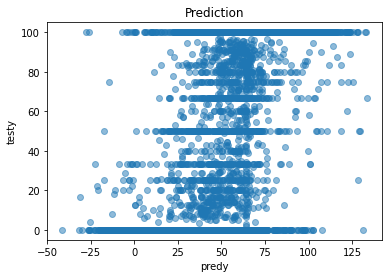

In [92]:
predy = model.predict(testx)
plt.scatter(predy, testy, alpha = 0.5)
plt.title('Prediction')
plt.xlabel('predy')
plt.ylabel('testy')
plt.show()

In [ ]:
#A classification model seems to be a better fit as the model would make categorical predictions. In this case, it would be a win, loss or a draw

0.7507577108218934


0.0    2783
1.0    2765
2.0      61
Name: Name1_res, dtype: int64

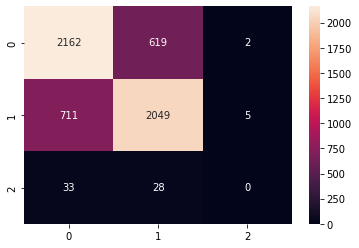

In [151]:
#CLassification Model

trainx, trainy, testx, testy, train_draw, test_draw = reset_model()


#To categorize the results into win, loss and draw
#0 represents a loss
#1 represents a win
#2 represents a draw
#'Where' is counter intuitive so the value is set to all fields where the condition is false. For instance, for instances where the values are below 50, it will be set to 0
testy.where(testy > 50, 0, inplace=True)
testy.where(testy <= 50, 1, inplace=True)

trainy.where(trainy > 50, 0, inplace=True)
trainy.where(trainy <= 50, 1, inplace=True)

train_draw = train_draw >= 50
test_draw = test_draw >= 50
testy[test_draw] = 2
trainy[train_draw] = 2

#RandomForestClassifier is used with the default parameters as they provided the best accuracy score
class_model = RandomForestClassifier(
        n_estimators = 100,
        criterion = 'gini'
    ).fit(trainx, trainy)

#To predict the model
print(class_model.score(testx, testy))
pred = class_model.predict(testx)

#To represent the model with a confusion matrix and a heatmap
cm = confusion_matrix(testy, pred)
hmap = sns.heatmap(cm, annot = True, fmt='g')

#To view the counts in order to understand better the graph
testy.value_counts()


In [ ]:
trainx

In [ ]:
#The heatmap above represents the prediction's accuracy to determine the results
#As expected the category 'Draw'


In [11]:
#Export the Classification Model
pickle.dump(class_model, open('superheroe_model.sm', 'xb'))